# 🐸 파이썬으로 데이터 주무르기 

## 1장 서울시 구별 CCTV 현황 분석

일자: 2020-03-11 ~


### 이 장의 목표 
- 서울시 구별 CCTV 현황 분석하기 
- 단순히 어디에 CCTV가 많이 설치되었는지부터 구별 인구 대비 비율을 확인하는 것까지 진행! 
- 구별 CCTV 현황을 시각화

### 배우는 것 
- 파이썬의 기초 학습 
- pandas와 Matplotlib의 기초 학습

### 1-1 CCTV 현황과 인구 현황 데이터 구하기 

[서울 열린 데이터 광장](https://data.seoul.go.kr/dataList/OA-2734/C/1/datasetView.do)에서 데이터를 다운로드 받을 수 있음. 그러나 데이터 형식이 xlsx(엑셀)로 되어 있음. 이를 CSV 파일로 바꾸는 방법까지 알아두면 좋음. 서울통계 사이트 또한 개편되어서 직접 다운받아서 쓸 수 없으니 데이터를 올려놓을 것!

In [1]:
import pandas as pd 
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [2]:
CCTV_Seoul = pd.read_csv('01. CCTV_in_Seoul.csv', encoding = 'utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

In [5]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
pop_Seoul = pd.read_excel('01. population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [7]:
# why isn't it working?
'''
pop_Seoul = pd.read_excel('01. population_in_Seoul.xls', header= 2, parse_cols = 'B, D, G, J, N', encoding='utf-8')
pop_Seoul.head()
'''

"\npop_Seoul = pd.read_excel('01. population_in_Seoul.xls', header= 2, parse_cols = 'B, D, G, J, N', encoding='utf-8')\npop_Seoul.head()\n"

In [8]:
# If you want to know parameters you don't know, Here is a tip! 
pd.read_excel?

In [9]:
# Wow, it's working!
pop_Seoul = pd.read_excel('01. population_in_Seoul.xls', header= 2, usecols = 'B, D, G, J, N', inplace=True, encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [10]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                           pop_Seoul.columns[1] : '인구수',
                           pop_Seoul.columns[2] : '한국인',
                           pop_Seoul.columns[3] : '외국인',
                           pop_Seoul.columns[4] : '고령자'}, inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### pandas 기초 익히기 

- pandas와 numpy의 완전 기초
- drop도 집어넣기
- pandas cheet sheet 넣기

In [11]:
import pandas as pd 
import numpy as np

In [12]:
# Series, nan(not a number)
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [13]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
# 6행 4열의 random 변수 / index로 앞에서 만든 dates를, columns 이름은 저렇게!
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])
df.head(3)

,A,B,C,D
2013-01-01,-1.425115,-1.224715,0.357463,-0.267516
2013-01-02,-0.881083,-0.453551,-0.411200,-1.192433
2013-01-03,-1.439486,1.545763,0.787196,-0.639457


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-1.42511534, -1.22471532,  0.35746278, -0.26751585],
       [-0.88108292, -0.45355112, -0.4111998 , -1.19243301],
       [-1.43948628,  1.54576253,  0.78719605, -0.63945664],
       [ 1.39412712,  0.33174224, -0.16359243, -0.06143815],
       [-0.79379981,  0.02064273,  0.13854792,  0.71585878],
       [-0.68077446, -0.49723118,  0.18306959,  1.77841221]])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.637689,-0.046225,0.148581,0.055571
std,1.046581,0.942329,0.415586,1.054781
min,-1.439486,-1.224715,-0.411200,-1.192433
25%,-1.289107,-0.486311,-0.088057,-0.546471
50%,-0.837441,-0.216454,0.160809,-0.164477
75%,-0.709031,0.253967,0.313864,0.521535
max,1.394127,1.545763,0.787196,1.778412


In [20]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-03,-1.439486,1.545763,0.787196,-0.639457
2013-01-04,1.394127,0.331742,-0.163592,-0.061438
2013-01-05,-0.793800,0.020643,0.138548,0.715859
2013-01-02,-0.881083,-0.453551,-0.411200,-1.192433
2013-01-06,-0.680774,-0.497231,0.183070,1.778412
2013-01-01,-1.425115,-1.224715,0.357463,-0.267516


In [21]:
df

,A,B,C,D
2013-01-01,-1.425115,-1.224715,0.357463,-0.267516
2013-01-02,-0.881083,-0.453551,-0.411200,-1.192433
2013-01-03,-1.439486,1.545763,0.787196,-0.639457
2013-01-04,1.394127,0.331742,-0.163592,-0.061438
2013-01-05,-0.793800,0.020643,0.138548,0.715859
2013-01-06,-0.680774,-0.497231,0.183070,1.778412


In [22]:
df['A']

2013-01-01   -1.425115
2013-01-02   -0.881083
2013-01-03   -1.439486
2013-01-04    1.394127
2013-01-05   -0.793800
2013-01-06   -0.680774
Freq: D, Name: A, dtype: float64

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,-1.425115,-1.224715,0.357463,-0.267516
2013-01-02,-0.881083,-0.453551,-0.411200,-1.192433
2013-01-03,-1.439486,1.545763,0.787196,-0.639457


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.881083,-0.453551,-0.411200,-1.192433
2013-01-03,-1.439486,1.545763,0.787196,-0.639457
2013-01-04,1.394127,0.331742,-0.163592,-0.061438


In [25]:
df.loc[dates[0]]

A   -1.425115
B   -1.224715
C    0.357463
D   -0.267516
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
df.loc[:, ['A','B']]

,A,B
2013-01-01,-1.425115,-1.224715
2013-01-02,-0.881083,-0.453551
2013-01-03,-1.439486,1.545763
2013-01-04,1.394127,0.331742
2013-01-05,-0.793800,0.020643
2013-01-06,-0.680774,-0.497231


In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.881083,-0.453551
2013-01-03,-1.439486,1.545763
2013-01-04,1.394127,0.331742


In [28]:
df.loc['20130102',['A','B']]

A   -0.881083
B   -0.453551
Name: 2013-01-02 00:00:00, dtype: float64

In [29]:
df.loc[dates[0],'A']

-1.4251153431198946

In [30]:
df.iloc[3]

A    1.394127
B    0.331742
C   -0.163592
D   -0.061438
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.394127,0.331742
2013-01-05,-0.793800,0.020643


In [32]:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,-0.881083,-0.411200
2013-01-03,-1.439486,0.787196
2013-01-05,-0.793800,0.138548


In [33]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.881083,-0.453551,-0.411200,-1.192433
2013-01-03,-1.439486,1.545763,0.787196,-0.639457


In [34]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.224715,0.357463
2013-01-02,-0.453551,-0.411200
2013-01-03,1.545763,0.787196
2013-01-04,0.331742,-0.163592
2013-01-05,0.020643,0.138548
2013-01-06,-0.497231,0.183070


In [35]:
df

,A,B,C,D
2013-01-01,-1.425115,-1.224715,0.357463,-0.267516
2013-01-02,-0.881083,-0.453551,-0.411200,-1.192433
2013-01-03,-1.439486,1.545763,0.787196,-0.639457
2013-01-04,1.394127,0.331742,-0.163592,-0.061438
2013-01-05,-0.793800,0.020643,0.138548,0.715859
2013-01-06,-0.680774,-0.497231,0.183070,1.778412


In [36]:
# 칼럼 A에서 0보다 큰 row만! 
df[df.A > 0]

,A,B,C,D
2013-01-04,1.394127,0.331742,-0.163592,-0.061438


In [37]:
# 데이터 전체에 조건을 걸면 만족하지 않은 곳은 NaN 처리 
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.357463,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,1.545763,0.787196,NaN
2013-01-04,1.394127,0.331742,NaN,NaN
2013-01-05,NaN,0.020643,0.138548,0.715859
2013-01-06,NaN,NaN,0.183070,1.778412


In [38]:
# 동일한 데이터 프레임을 하나더 만들고 싶을때 copy()
df2 = df.copy()
df2

,A,B,C,D
2013-01-01,-1.425115,-1.224715,0.357463,-0.267516
2013-01-02,-0.881083,-0.453551,-0.411200,-1.192433
2013-01-03,-1.439486,1.545763,0.787196,-0.639457
2013-01-04,1.394127,0.331742,-0.163592,-0.061438
2013-01-05,-0.793800,0.020643,0.138548,0.715859
2013-01-06,-0.680774,-0.497231,0.183070,1.778412


In [39]:
df2['E'] = ['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-1.425115,-1.224715,0.357463,-0.267516,one
2013-01-02,-0.881083,-0.453551,-0.411200,-1.192433,one
2013-01-03,-1.439486,1.545763,0.787196,-0.639457,two
2013-01-04,1.394127,0.331742,-0.163592,-0.061438,three
2013-01-05,-0.793800,0.020643,0.138548,0.715859,four
2013-01-06,-0.680774,-0.497231,0.183070,1.778412,three


In [40]:
# E 컬럼에 two와 four가 있냐
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [41]:
# apply는 통계 느낌의 데이터를 보고 싶을 때. cumsum은 누적합
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-1.425115,-1.224715,0.357463,-0.267516
2013-01-02,-2.306198,-1.678266,-0.053737,-1.459949
2013-01-03,-3.745685,-0.132504,0.733459,-2.099405
2013-01-04,-2.351557,0.199238,0.569867,-2.160844
2013-01-05,-3.145357,0.219881,0.708415,-1.444985
2013-01-06,-3.826132,-0.277350,0.891484,0.333427


In [42]:
# lambda를 활용해 최대값과 최소값의 차이 정의하기
df.apply(lambda x: x.max() - x.min())

A    2.833613
B    2.770478
C    1.198396
D    2.970845
dtype: float64

### pandas 이용해서 CCTV와 인구 현황 데이터 파악하기 
- 데이터 전처리 과정

In [43]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [44]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


도메인 지식: 강남 3구 중 하나인 송파구가 CCTV가 가장 적은 구 중 하나라는 건데, 송파구는 범죄율이 결코 낮은 구가 아님. 근데 CCTV가 적은 구 중에 하나임.

In [45]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [46]:
# 최근 3년간 CCTV 설치 증가율
CCTV_Seoul['최근증가율'] = ((CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] 
                       + CCTV_Seoul['2016년']) / CCTV_Seoul['2013년도 이전']) * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


최근 3년간 CCTV가 그 이전 대비 많이 증가한 구는 종로구, 도봉구, 마포구, 노원구, 강동구라는 것. 

In [47]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [48]:
# inplace는 되돌릴 수 없으므로 조심히 사용할 것!
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [49]:
# 한번 이상 나타난 데이터 찾기 
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [50]:
# nan 어디에 있는지 찾기 
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [51]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [52]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [53]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


인구수로 정렬 시에 송파구, 강서구, 강남구, 노원구, 관악구 순으로 인구가 많음! 

In [54]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [55]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [56]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [57]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


지금까지 확인한 내용도 중요하나 여전히 우리는 CCTV의 현황을 완전히 파악한 것 같지 않음. **인구 대비 CCTV 현황 같은 내용**을 확인하고 싶은데, 그러기 위해서는 두 데이터를 병합해야 함!

### 1-5 pandas 고급 기능 - 두 DataFrame 병합하기 


In [58]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [59]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [60]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [61]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [62]:
# 데이터를 row 방향으로 합치는 것: concat()
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [63]:
# 다중 index 형성 즉, 여기는 index가 2개!
result = pd.concat([df1, df2, df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [64]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [65]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [66]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [67]:
# 칼럼으로 붙음
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


index 기준으로 데이터를 합치기 때문에 값을 가질 수 없는 곳에는 NaN이 저장되는 것. 

In [68]:
# 공통된 index는 합치고 공통되지 않은 index의 데이터는 버리도록 하는 옵션이 join='inner'
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [69]:
# future warning은 미래에 이 기능이 사라진다는 말! 
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  


,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [70]:
# df1 index를 기준으로 result의 인덱스를 맞추는 것
result.reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [71]:
# 이 옵션은 두 데이터의 index를 무시하고 합친 후 다시 index를 부여하는 것. 열을 기준으로 합침.
result = pd.concat([df1, df4], ignore_index=True)
result

/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [72]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [73]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [74]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [75]:
# 공통된 key에 대해서만 합침
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [76]:
# 합치는 두 데이터를 하나씩 기준으로 합칠 수도 있음.
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [77]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [78]:
# 합집합으로 merge
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [79]:
# 교집합으로 merge 
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


### 1-6 CCTV 데이터와 인구 현황 데이터를 합치고 분석하기 


In [80]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [81]:
# 행 삭제 drop, 열 삭제 del 
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [82]:
# 그래프 그릴 때를 생각하면, index는 구 이름이 되면 유리함. 
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


- 고령자 비율과 외국인비율, 인구수 중에서 어떤 데이터와 CCTV를 비교할 것인가? 
- 상관계수로 접근! numpy의 corrcoef 명령

In [83]:
# 약한 음의 상관관계 
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [84]:
# 상관관계가 거의 없다고 할 수 있음. 
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [85]:
# 0.3이어서 약한 상관관계 
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [86]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [87]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 1-7 파이썬의 대표 시각화 도구 - Matplotlib

In [88]:
import matplotlib.pyplot as plt 
%matplotlib inline

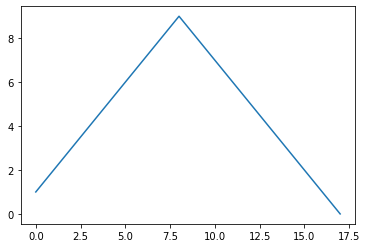

In [90]:
plt.figure  # 이게 뭐더라? 
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [91]:
t = np.arange(0,12,0.01) # 0부터 12까지 0.01 간격으로 ndarray를 만들어라. 
y = np.sin(t) # sin 함수 만들기 

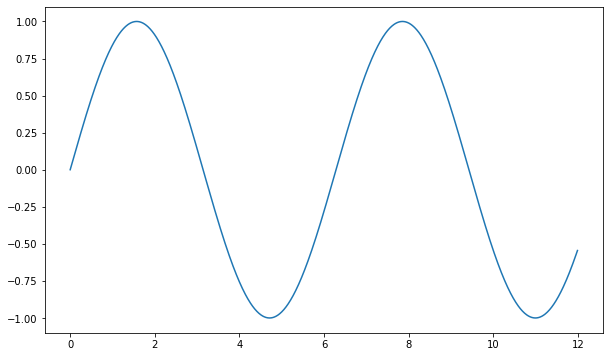

In [92]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.show()

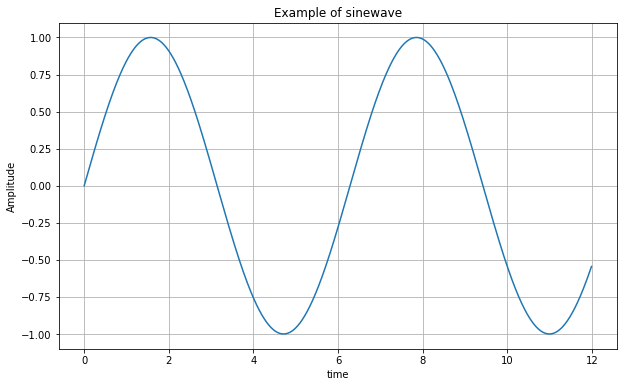

In [93]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

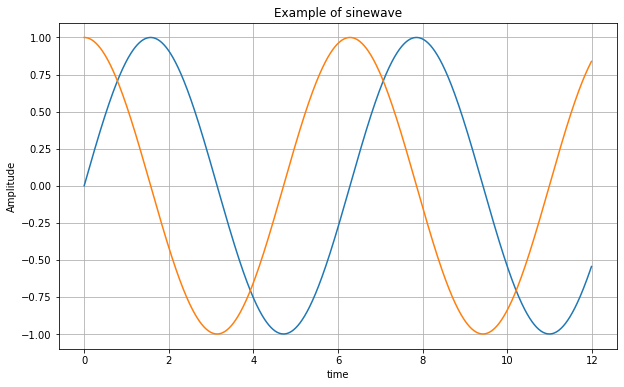

In [94]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

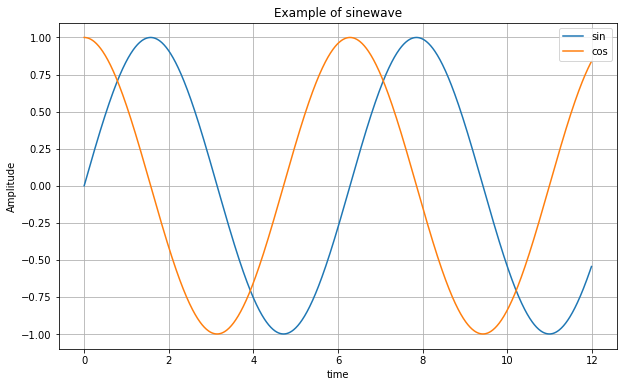

In [98]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

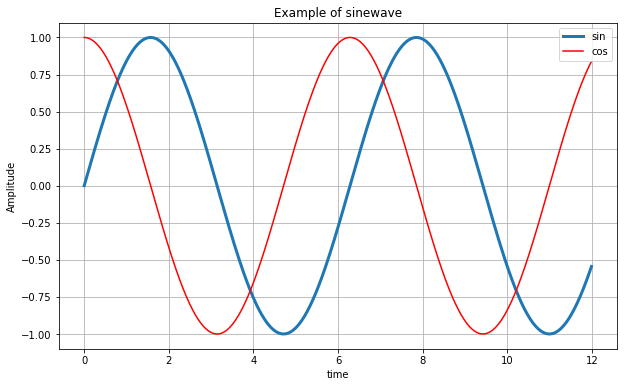

In [99]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')   # lw는 선굵기
plt.plot(t, np.cos(t), 'r', label='cos')    # 선색 red로! 
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

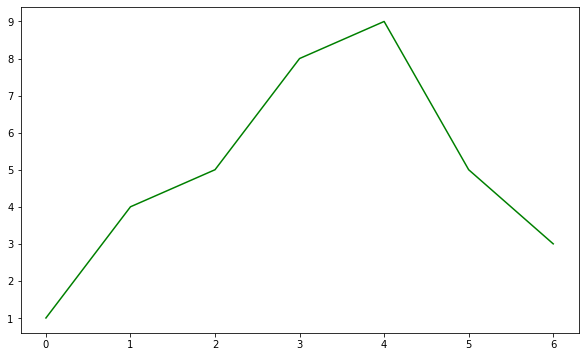

In [100]:
t = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]
plt.figure(figsize=(10,6))
plt.plot(t,y, color='green')
plt.show()

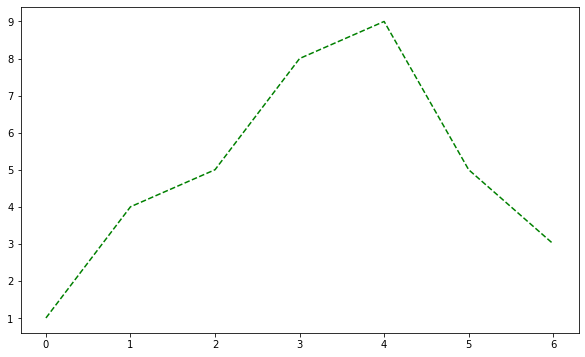

In [101]:
plt.figure(figsize=(10,6))
plt.plot(t,y, color='green', linestyle='dashed')
plt.show()

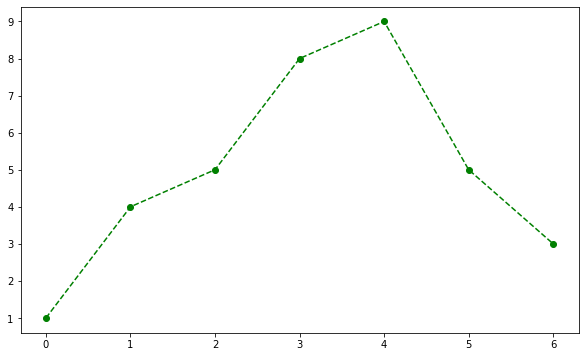

In [102]:
plt.figure(figsize=(10,6))
plt.plot(t,y, color='green', linestyle='dashed', marker='o')
plt.show()

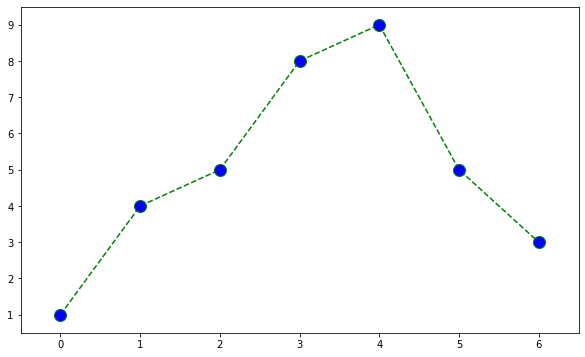

In [103]:
plt.figure(figsize=(10,6))
plt.plot(t,y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12)
plt.xlim([-0.5, 6.5]) # x축 한계 정하기 
plt.ylim([0.5, 9.5])  # y축 한계 정하기 
plt.show()

In [104]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

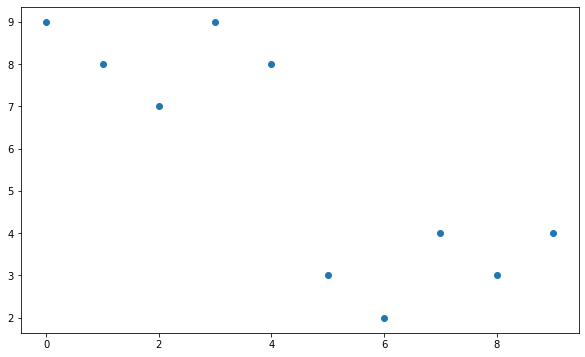

In [105]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

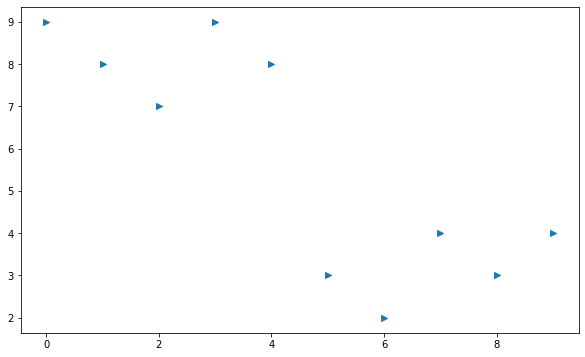

In [107]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

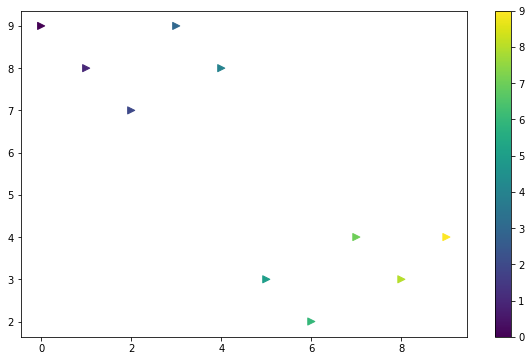

In [108]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')  # s는 marker의 크기 
plt.colorbar()
plt.show()

In [109]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

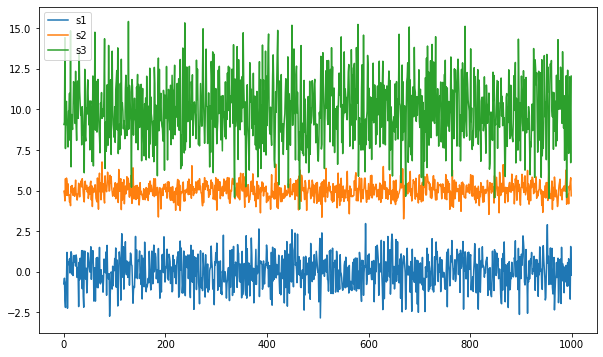

In [110]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

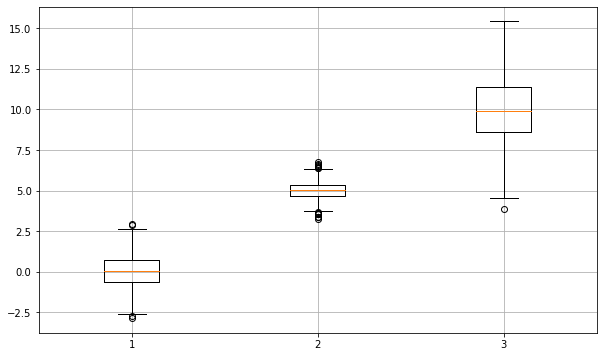

In [111]:
plt.figure(figsize=(10,6))
plt.boxplot((s1,s2,s3))
plt.grid()
plt.show()

### 1-8 CCTV 현황 그래프로 분석하기 

matmplotlib는 한글을 지원하지 않기 때문에 matplotlib의 폰트를 변경해야 함.

In [115]:
# 이거는 그냥 가져다 붙이면 됩니다. 이해 할필요 없어요.
import platform 

from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [116]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


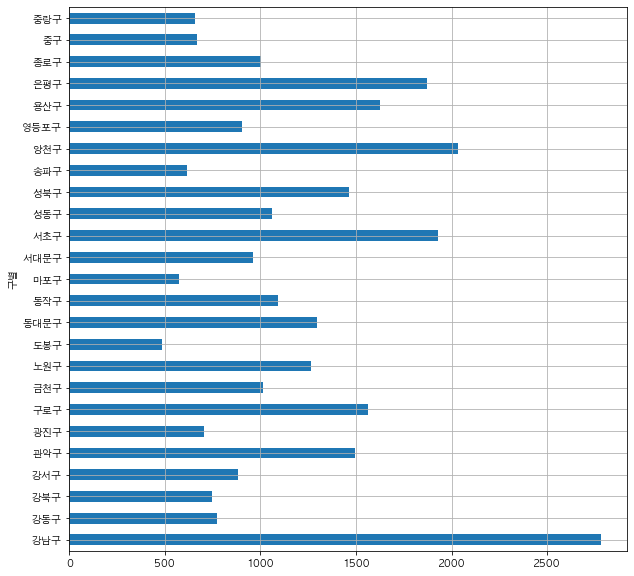

In [117]:
# kind는 표 형식이 수평바라는 것 
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

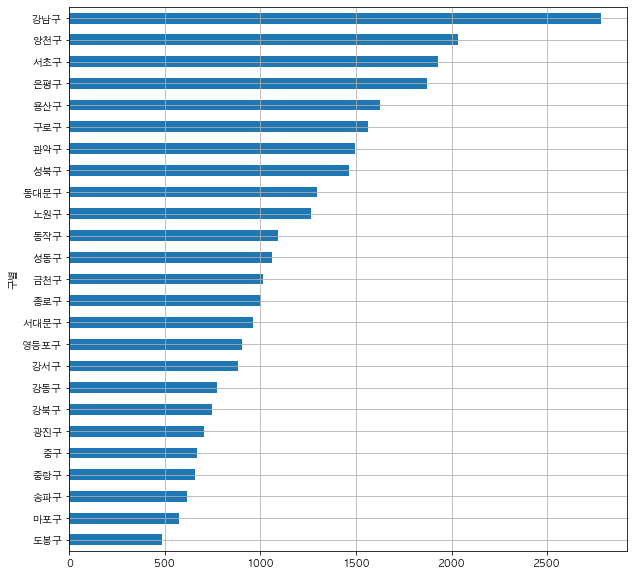

In [118]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

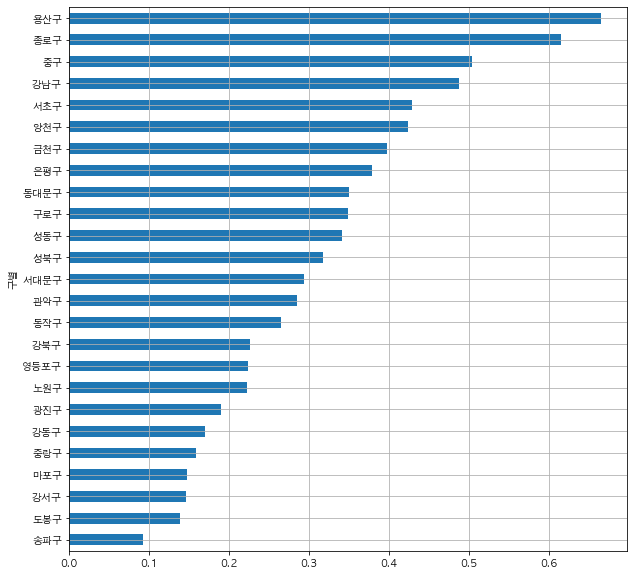

In [119]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

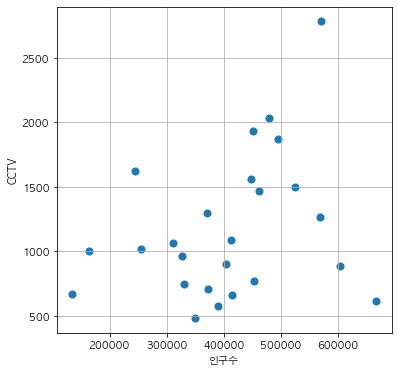

In [120]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [121]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1) # 추세선 만들기(직선)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [122]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

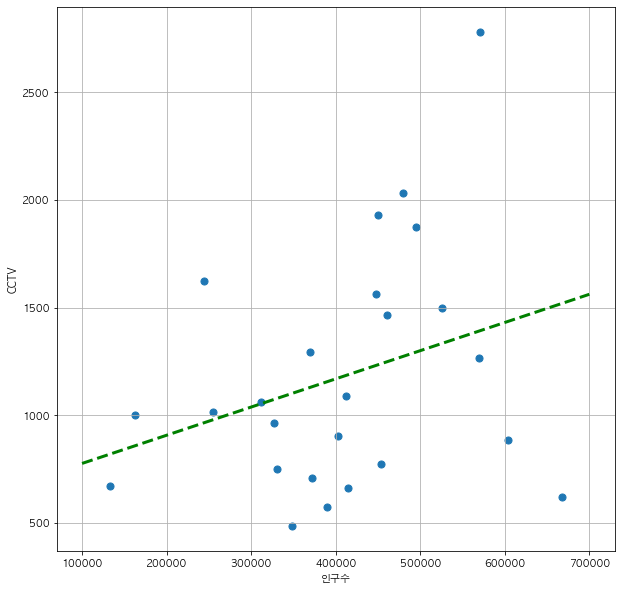

In [124]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [126]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


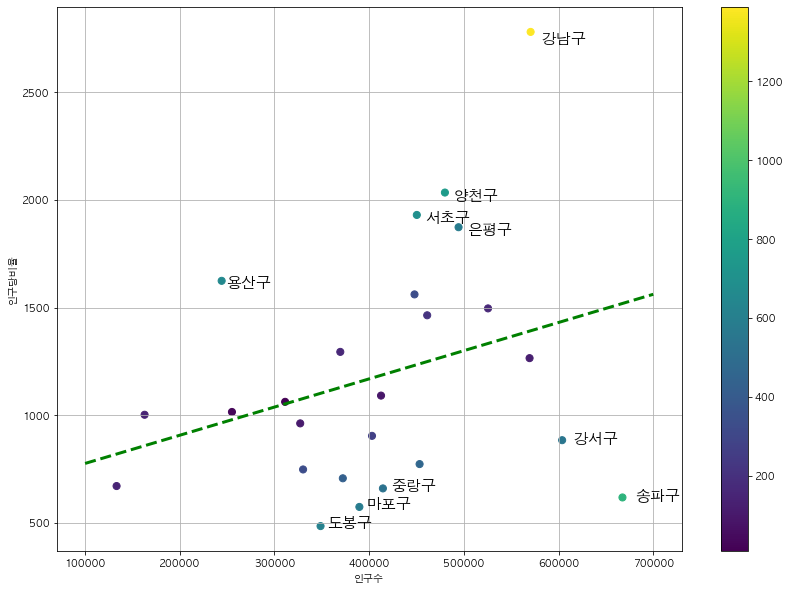

In [127]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],
           c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()